<a href="https://colab.research.google.com/github/hemant5668/google-stock-price-prediction/blob/master/google_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#part-1  data preprocessing

In [0]:
#importing training set
dataset_train=pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2]

In [34]:
training_set.head(5)

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [0]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set_scales=sc.fit_transform(training_set)

In [0]:
#creating a data structure with 60 timestamp and 1 output
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scales[i-60: i,:])
  y_train.append(training_set_scales[i,:])
x_train,y_train=np.array(x_train),np.array(y_train)  

In [0]:
#reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [51]:
x_train.shape
#part-2 building RNN

(1198, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM


In [0]:
regessor=Sequential()
#adding layers to the rnn and dropout
regessor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),dropout=0.2))
regessor.add(LSTM(units=50,return_sequences=True,dropout=0.2))
regessor.add(LSTM(units=50,return_sequences=True,dropout=0.2))
regessor.add(LSTM(units=50,dropout=0.2))
regessor.add(Dense(units=1))#utput layer

In [64]:
#compiling the Rnn
regessor.compile(optimizer='adam',loss='mean_squared_error')

In [65]:
#fit to rnn
regessor.fit(x_train,y_train,batch_size=32,epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0813
Epoch 2/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0455
Epoch 3/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0398
Epoch 4/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0409
Epoch 5/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0390
Epoch 6/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0361
Epoch 7/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0318
Epoch 8/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0295
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0207
Epoch 10/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0113
Epoch 11/100
1198/1198 [====================

In [0]:
#part-3 make predictions and visualize the result

In [0]:
dataset_test=pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock=dataset_test.iloc[:,1:2]

In [0]:
#predicted the stock price of 2017
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [0]:
final_stock=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [0]:
final_stock=final_stock.reshape(-1,1)

In [0]:
final_stock=sc.transform(final_stock)

In [0]:
X_test=[]
for i in range(60,80):
  X_test.append(final_stock[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock=regessor.predict(X_test)
predicted_stock=sc.inverse_transform(predicted_stock)

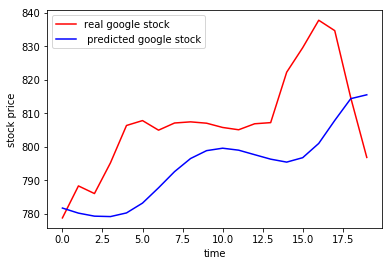

In [102]:
#visualisation
plt.plot(real_stock,color='red',label='real google stock')
plt.plot(predicted_stock,color='blue',label=' predicted google stock')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()